<a href="https://colab.research.google.com/github/NaraSurya/Cell-Malaria-Classification/blob/master/Classification_Malaria_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from zipfile import ZipFile

with ZipFile('/content/drive/My Drive/cell-images-for-detecting-malaria.zip', 'r') as zipObj:
  zipObj.extractall()


In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


In [0]:
dirParasitized = '/content/cell_images/Parasitized/'
dirUninfected = '/content/cell_images/Uninfected/'

parasitizeds = os.listdir(dirParasitized)
uninfecteds = os.listdir(dirUninfected)

print("total data parasitized : {}\ntotal data uninfected : {}".format(len(parasitizeds),
                                                                       len(uninfecteds)))


total data parasitized : 13780
total data uninfected : 13780


In [0]:
data = []
label = []

for parasitized in parasitizeds :
  if parasitized.endswith(('.png', '.jpg', '.jpeg')): 
    image = cv2.imread(dirParasitized+parasitized)
    resize_image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
    data.append(np.array(resize_image))
    label.append(1)

for uninfected in uninfecteds :
  if uninfected.endswith(('.png', '.jpg', '.jpeg')): 
    image = cv2.imread(dirUninfected+uninfected)
    resize_image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
    data.append(np.array(resize_image))
    label.append(0)

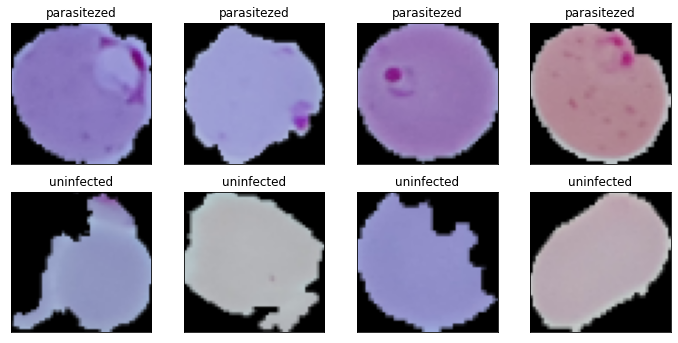

In [0]:
plt.figure(1, figsize = (15 , 15))
for index in range(0,4):
  plt.subplot(5,5,index+1)
  plt.title("parasitezed")
  plt.xticks([]) , plt.yticks([])
  plt.imshow(data[index])

for index in range(15000,15004):
  plt.subplot(5,5,index+6-15000)
  plt.xticks([]) , plt.yticks([])
  plt.title("uninfected")
  plt.imshow(data[index])

In [0]:

data = np.array(data)
label = np.array(label)
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
label = label[n]
data = data/255.0


In [0]:
train_image , test_image , train_label , test_label = train_test_split(data,label,test_size=0.2)
print("data for training : {} \ndata for testing : {}".format(len(train_image),
                                                          len(test_image)))

data for training : 22046 
data for testing : 5512


In [0]:
train_image.shape
train_label.shape

(22046,)

In [0]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = models.Sequential()


  model.add(layers.Conv2D(32, (5, 5), 
                          activation='relu',
                          padding ='same',
                          strides=(2,2),
                          input_shape=(50, 50, 3)))
  
  model.add(layers.MaxPooling2D((2, 2) , 
                                padding='valid'))
  
  model.add(BatchNormalization())


  model.add(layers.Conv2D(32, (5, 5),
                          padding ='same',
                          activation='relu',
                          strides=(1,1)))
  
  model.add(layers.MaxPooling2D((2, 2),
                                padding='valid'))

  model.add(BatchNormalization())
  

  model.add(layers.Conv2D(64, (3, 3), 
                          padding ='same',
                          activation='relu',
                          strides=(1,1)))
  
  model.add(layers.Conv2D(64, (3, 3), 
                          padding ='same',
                          activation='relu',
                          strides=(1,1)))
  
  model.add(layers.Conv2D(128, (3, 3), 
                          padding ='same',
                          activation='relu',
                          strides=(1,1)))
  model.add(layers.Flatten())
  

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.5))

  model.add(tf.keras.layers.Dense(units=64, activation='relu')) 

  model.add(tf.keras.layers.Dense(units=2, activation='softmax'))                          
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  model = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = model.epoch
  hist = pd.DataFrame(model.history)

  return epochs, hist , model 

In [0]:
learning_rate = 0.00002

# Establish the model's topography.
my_model = create_model(learning_rate)

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)         

In [0]:
epochs = 15
batch_size = 64
validation_split = 0.2
# Train the model on the normalized training set.

epochs, hist, model = train_model(my_model, train_image, train_label, 
                           epochs, batch_size, validation_split)



Epoch 1/15
276/276 [==============================] - 41s 150ms/step - loss: 0.6501 - accuracy: 0.6124 - val_loss: 0.6791 - val_accuracy: 0.5175
Epoch 2/15
276/276 [==============================] - 41s 149ms/step - loss: 0.5905 - accuracy: 0.6904 - val_loss: 0.5990 - val_accuracy: 0.6717
Epoch 3/15
276/276 [==============================] - 41s 150ms/step - loss: 0.5356 - accuracy: 0.7395 - val_loss: 0.6048 - val_accuracy: 0.6755
Epoch 4/15
276/276 [==============================] - 41s 150ms/step - loss: 0.4803 - accuracy: 0.7774 - val_loss: 0.5613 - val_accuracy: 0.7166
Epoch 5/15
276/276 [==============================] - 41s 149ms/step - loss: 0.4158 - accuracy: 0.8115 - val_loss: 0.4703 - val_accuracy: 0.7667
Epoch 6/15
276/276 [==============================] - 41s 150ms/step - loss: 0.3634 - accuracy: 0.8400 - val_loss: 0.4076 - val_accuracy: 0.8156
Epoch 7/15
276/276 [==============================] - 42s 150ms/step - loss: 0.3327 - accuracy: 0.8556 - val_loss: 0.3173 - val_ac

In [0]:
train_label

array([1, 0, 0, ..., 0, 1, 1])

Loaded the plot_curve function.


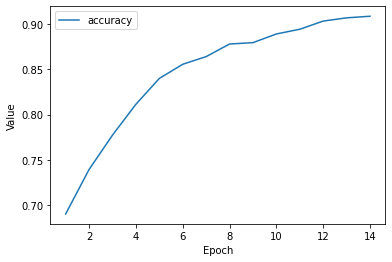

In [0]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")
# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = my_model.predict(test_image)
predictions = np.argmax(predictions, axis = 1)
print(classification_report(test_label, predictions))
print(confusion_matrix(test_label, predictions))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2728
           1       0.87      0.91      0.89      2784

    accuracy                           0.88      5512
   macro avg       0.88      0.88      0.88      5512
weighted avg       0.88      0.88      0.88      5512

[[2349  379]
 [ 264 2520]]


In [0]:
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0: 2613, 1: 2899}

**ARTIFICIAL NEURAL NETWORK**

In [0]:
def create_ann_model(learning_rate_ann):
  #All model in this course are sequential
  model = models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(50, 50, 3)))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dense(units=2, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate_ann),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model    

def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

In [0]:
ann_learning_rate = 0.00002

# Establish the model's topography.
my_ann_model = create_ann_model(ann_learning_rate)

my_ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 7500)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               960128    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 993,410
Trainable params: 993,410
Non-trainable params: 0
_________________________________________________________________


TRAIN MODEL

In [25]:
epochs = 15
batch_size = 128
validation_split = 0.2
# Train the model on the normalized training set.

epochs, hist= train_model(my_ann_model, train_image, train_label, 
                           epochs, batch_size, validation_split)

Epoch 1/15
138/138 [==============================] - 3s 21ms/step - loss: 0.4633 - accuracy: 0.7794 - val_loss: 0.5637 - val_accuracy: 0.7086
Epoch 2/15
138/138 [==============================] - 3s 22ms/step - loss: 0.4587 - accuracy: 0.7844 - val_loss: 0.5636 - val_accuracy: 0.7141
Epoch 3/15
138/138 [==============================] - 3s 22ms/step - loss: 0.4566 - accuracy: 0.7850 - val_loss: 0.5635 - val_accuracy: 0.7125
Epoch 4/15
138/138 [==============================] - 3s 21ms/step - loss: 0.4542 - accuracy: 0.7840 - val_loss: 0.5635 - val_accuracy: 0.7132
Epoch 5/15
138/138 [==============================] - 3s 21ms/step - loss: 0.4483 - accuracy: 0.7902 - val_loss: 0.5669 - val_accuracy: 0.7134
Epoch 6/15
138/138 [==============================] - 3s 21ms/step - loss: 0.4462 - accuracy: 0.7920 - val_loss: 0.5627 - val_accuracy: 0.7120
Epoch 7/15
138/138 [==============================] - 3s 22ms/step - loss: 0.4454 - accuracy: 0.7903 - val_loss: 0.5870 - val_accuracy: 0.7052